In [1]:
import cv2
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def is_image_dull(image_path, brightness_thresh=110, contrast_thresh=50):
    """
    Returns True if the image is dull (needs strong enhancement), False if good (needs gentle).
    """
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray)
    contrast = np.std(gray)
    return not ((mean_brightness > brightness_thresh) and (contrast > contrast_thresh))

In [3]:
def gentle_enhance(pil_img):
    pil_img = ImageEnhance.Contrast(pil_img).enhance(1.05)
    pil_img = ImageEnhance.Sharpness(pil_img).enhance(1.03)
    pil_img = ImageEnhance.Brightness(pil_img).enhance(1.02)
    return pil_img

In [4]:
def dull_enhance(pil_img):
    pil_img = ImageEnhance.Sharpness(pil_img).enhance(2.0)
    pil_img = ImageEnhance.Contrast(pil_img).enhance(1.5)
    pil_img = ImageEnhance.Brightness(pil_img).enhance(1.2)
    return pil_img

In [5]:
def display_images(original, enhanced, title_original="Original", title_enhanced="Enhanced"):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title(title_original)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(enhanced)
    plt.title(title_enhanced)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [6]:
def save_enhanced(enhanced_img, image_path):
    save_dir = r'OUTPUT_FOLDER_PATH'
    os.makedirs(save_dir, exist_ok=True)
    fname = os.path.basename(image_path)
    save_path = os.path.join(save_dir, f"enhanced_{fname}")
    enhanced_img.save(save_path)
    print(f"Enhanced image saved at: {save_path}")

In [7]:
def enhance_and_show(image_path):
    pil_img = Image.open(image_path).convert("RGB")
    is_dull = is_image_dull(image_path)
    if is_dull:
        print("Image detected as dull. Applying strong enhancement...")
        enhanced_img = dull_enhance(pil_img.copy())
    else:
        print("Image detected as good. Applying gentle enhancement...")
        enhanced_img = gentle_enhance(pil_img.copy())
    display_images(pil_img, enhanced_img)
    save_enhanced(enhanced_img, image_path)

Image detected as dull. Applying strong enhancement...


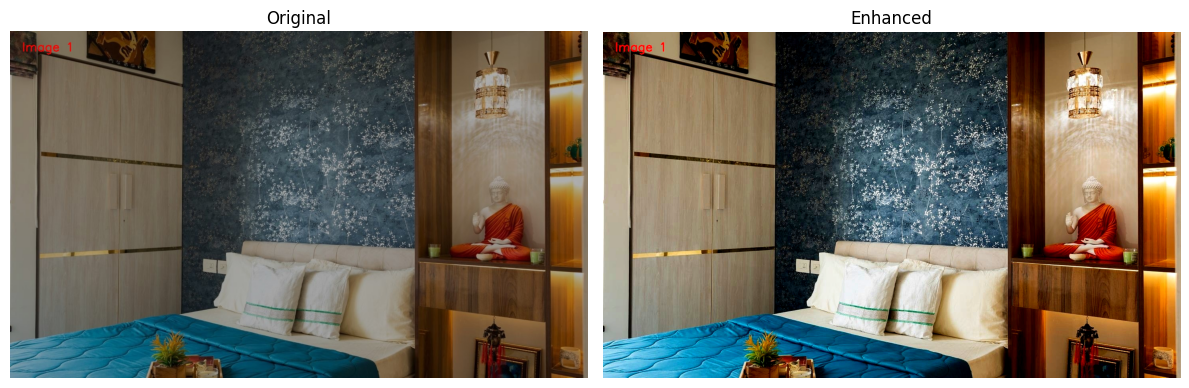

Enhanced image saved at: D:/AutoEnhnace/enhanced\enhanced_numbered_1.jpg


In [8]:

# Usage
image_path = r"IMAGE_FOLDER_PATH"  # update this path as needed
enhance_and_show(image_path)